**<p style='text-align: right;'>Ver. 1.0</p>**

# Introductory Applied Machine Learning (IAML) Coursework - Semester 2, 2022-23

### Author: Hiroshi Shimodaira and Rohan Gorantla

## Important Instructions

#### It is important that you follow the instructions below carefully for things to work properly.

You need to set up and activate your environment as you would do for your labs, see Learn section on Labs.  **You will need to use Noteable to create the files you will submit (the Jupyter (IPynthon) Notebook and the PDF)**.  Do **NOT** create the PDF in some other way, we will not be able to mark it.  If you want to develop your answers in your own environment, you should make sure you are using the same packages we are using, by running the cell which does imports below.

Read the instructions in this notebook carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the required code/markdown cell.

- We will use the IAML Learn page for any announcements, updates, and FAQs on this assignment. Please ***visit the page frequently*** to find the latest information/changes.
- Data files that you will be using are included in the coursework zip file that you have downloaded from the Learn assignment page for this coursework.
- There is a helper file 'iaml23cw_helpers.py' in the zip file, which you should upload to your environment.
- Some of the topics in this coursework are covered in weeks 7 and 8 of the course. Focus first on questions on topics that you have covered already, and come back to the other questions as the lectures progress.
- Keep your answers brief and concise.
- Make sure to show all your code/working.
- All the figures you present should have axis labels, titles, and grid lines unless specified explicitly. If you think grid lines spoiling readability, you can adjust the line width and/or line style. Figures should not be too small to read.
- Write readable code. While we do not expect you to follow PEP8 to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. Do use inline comments when doing something non-standard.
- When asked to present numerical values, make sure to represent real numbers in the appropriate precision corresponding to your answer. 
- When you use libraries specified in this coursework, you should use the default parameters unless specified explicitly.
- The criteria on which you will be judged include the quality of the textual answers and/or any plots asked for. For higher marks, when asked you need to give good and concise discussions based on experiments and theories using your own words.

- You will see <html>\\pagebreak</html> at the start of each subquestion.  ***Do not remove these, if you do we will not be able to mark your coursework.***

#### Good Scholarly Practice
Please remember the University requirement regarding all assessed work for credit. Details about this can be found at:
http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct

Specifically, this assignment should be your own individual work. We will employ tools for detecting misconduct.

Moreover, please note that Piazza is NOT a forum for discussing the solutions of the assignment. You may ask private questions. You can use the office hours to ask questions.

### SUBMISSION Mechanics
This assignment will account for 30% of your final mark. We ask you to submit answers to all questions.

You will submit (1) a PDF of your Notebook and (2) the Notebook itself via Gradescope.  Your grade will be based on the PDF, we will only use the Notebook if we need to see details.  **You must use the following procedure to create the materials to submit**.

1. Make sure your Notebook, the helper file, and the datasets are in Noteable and will run.  If you developed your answers in Noteable, this is already done.

2. Select **Kernel->Restart & Run All** to create a clean copy of your submission, this will run the cells in order from top to bottom.  This may take a while (a few hours) to complete, ensure that all the output and plots have complete before you proceed.

3. Select **File->Download as->PDF via LaTeX (.pdf)** and wait for the PDF to be created and downloaded.

4. Select **File->Download as->Notebook (.ipynb)**

5. You now should have in your download folder the pdf and the notebook.  Rename them sNNNNNNN.pdf and sNNNNNNN.ipynb, where sNNNNNNN is your matriculation number (student number).

**Details on submission instructions will be announced and documented on Learn before the deadline**. 

The submission deadline for this assignment is **28th March 2023 at 12:00 (midday) UK time (UTC)**.  Don't leave it to the last minute!


#### IMPORTS
Execute the cell below to import all packages you will be using for this assignment.  If you are not using Noteable, make sure the python and package version numbers reported match the python and package numbers, which can be checked by running the following cell. The Python version does not need to be the same, but it should be $3.9.p$, where $p \ge 12$.

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from iaml23cw_helpers import *
print_versions();

# You may add other libraries here or in your other cells as needed.
from sklearn.metrics import r2_score # 1.3.1
from sklearn.metrics import mean_squared_error #1.3.3
import math # 1.3.3? was here but not sure if i need it.
from sklearn.model_selection import KFold # For 1.6.1
from sklearn import preprocessing # For 1.6? LR RFC DTC DT
from sklearn.pipeline import make_pipeline # 1.6
from sklearn.preprocessing import StandardScaler # 1.6
from sklearn import metrics # 1.6.2
from sklearn.preprocessing import StandardScaler # For 1.7, if needed, will see
from sklearn.preprocessing import normalize # For 1.8
from scipy.stats import ttest_rel # for 1.8.3
from sklearn.cluster import KMeans # 2.2

Python	3.9.12 : Ok
Scipy	1.7.3 : Ok
Numpy	1.21.6 : Ok
Sklearn	1.1.1 : Ok
Pandas	1.4.2 : Ok
Matplotlib	3.5.2 : Ok
Seaborn	0.11.2 : Ok


\pagebreak

# Question 1: Experiments with a stock price  data set

#### 65 marks out of 130 for this coursework

The stock price data set we use in this coursework is a stock market index (composite stock price index of common stocks) in a country for the period between 2000 and 2022, consisting of four historical prices ('Open', 'High', 'Low', 'Close', which denote the opening, highest, lowest, and closing prices on the trading day, respectively) and trading volume. For the convenience of the coursework, we have added some features to the data set. They are four [technical indicators](https://www.fidelity.com/bin-public/060_www_fidelity_com/documents/learning-center/Understanding-Indicators-TA.pdf) (RSI, SMA, BBP, ADX), 'Tomorrow', and 'Target'. 'Tomorrow' holds the closing price of next trading day, which we will use for price prediction, and 'Target' is a binary indicator (label), which takes 1 if 'Tomorrow' is higher than 'Close', 0 otherwise, which we will use for the prediction of movement direction.

*** Loading data ***
Make sure that you have the data set files "dset_q1a.csv" and "dset_q1b.csv" in your environment. We will use the first file in the following sub questions except the last subquestion 1.8. Run the following cell to load the first file.

In [2]:
# Load the data set "dset_q1a.csv"
df = pd.read_csv("dset_q1a.csv", index_col="Date")

# ========== Question 1.1 --- [5 marks] ==========
###  Describe the main properties of the data:
1. [Code] Display the shape of the data
2. [Code] Display the range of the dataframe index
3. [Code] What data are present and what types of data are they? Display the information using **pandas.DataFrame.info**.
4. [Code] Display overall descriptive statistics and yearly high/low/mean.

\pagebreak
## Your answers for Question 1.1

In [3]:
#(1) Your code goes here

# Show how many rows and columns there are 
df.shape
print(f'Shape of data: {df.shape}')

Shape of data: (5642, 11)


In [4]:
#(2) Your code goes here

# Display the range of the dataframe index
df.shape[0]

5642

In [5]:
#(3) Your code goes here

# Show the datatypes present and what data there is.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5642 entries, 2000-02-15 to 2022-12-28
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      5642 non-null   float64
 1   High      5642 non-null   float64
 2   Low       5642 non-null   float64
 3   Close     5642 non-null   float64
 4   Volume    5642 non-null   int64  
 5   RSI       5642 non-null   float64
 6   SMA       5642 non-null   float64
 7   BBP       5642 non-null   float64
 8   ADX       5642 non-null   float64
 9   Tomorrow  5642 non-null   float64
 10  Target    5642 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 528.9+ KB


In [6]:
#(4) Your code goes here

# # Display overall discriptive statistics.
print(df.describe())

# Copy the dataset so as to not cause problems further on.
df_yearly = df.copy()

# Convert the date column to datetime format
df_yearly.index = pd.to_datetime(df_yearly.index)

# calculate the yearly high, low, and mean
yearly_high = df_yearly.resample('Y').max()
yearly_low = df_yearly.resample('Y').min()
yearly_mean = df_yearly.resample('Y').mean()

# Print the results
print("\n\nYearly Highs:")
print(yearly_high)
print("\nYearly Lows:")
print(yearly_low)
print("\nYearly Means:")
print(yearly_mean)



              Open         High          Low        Close        Volume  \
count  5642.000000  5642.000000  5642.000000  5642.000000  5.642000e+03   
mean   1695.070816  1704.681792  1682.832751  1694.229604  4.753566e+05   
std     667.758367   669.381835   665.285326   667.265775  2.635486e+05   
min     466.570007   472.309998   463.540009   468.760010  1.363000e+05   
25%    1120.412445  1132.850037  1107.872528  1117.657471  3.152250e+05   
50%    1893.909973  1905.219971  1881.940002  1894.200012  4.020000e+05   
75%    2077.562439  2087.687439  2065.687500  2076.790039  5.417000e+05   
max    3305.459961  3316.080078  3295.439941  3305.209961  3.455500e+06   

               RSI          SMA          BBP          ADX     Tomorrow  \
count  5642.000000  5642.000000  5642.000000  5642.000000  5642.000000   
mean     52.459480  1690.582361     0.542747    24.215828  1694.470069   
std      12.487002   665.794759     0.332959     8.869783   667.216646   
min      12.145341   502.416

\pagebreak

# ========== Question 1.2 --- [8 marks] ==========
Perform an *exploratory data analysis* on the dataset by studying the following:
1. [Code and text] Plot the trend of stock market closing prices in the given timeframe and comment on it.
2. [Code] For the year 2007 and 2008, plot the closing price and volumes by showing the months with highest and lowest closing and volumes traded.
3. [Code] Plot a pairplot using the seaborn **pairplot** and report the patterns in the given dataset.
4. [Code] Plot the correlation matrix for the dataset features.
5. [Text] Based on the results you obtained in 3 and 4 above, comment on the relationships among the features present in the dataset.

\pagebreak
## Your answers for Question 1.2

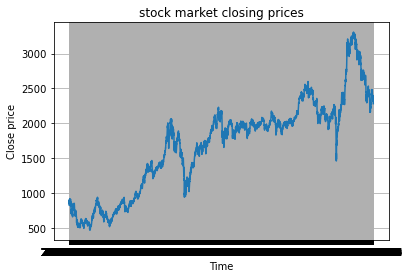

In [7]:
#(1) Your code and text goes here

# get your x and y variables.
x_values = df.index
y_values = df["Close"]

# plot these variables
plt.plot(x_values, y_values)
plt.xlabel('Time')
plt.ylabel('Close price')
plt.title('stock market closing prices')
plt.grid()
plt.show()

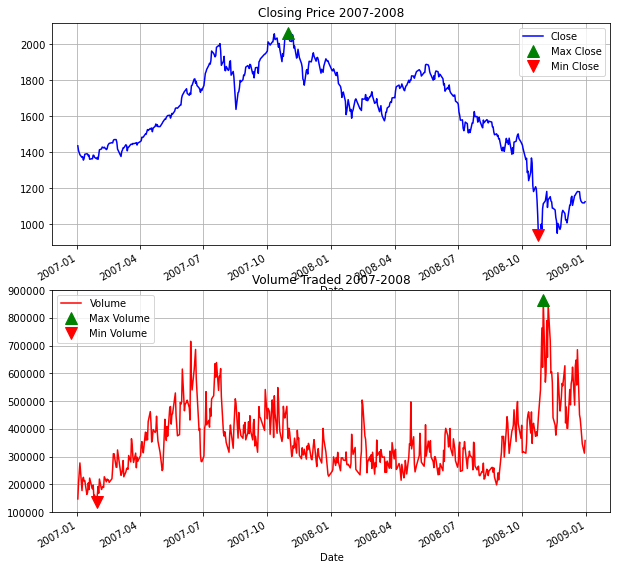

In [8]:
# Ensure the DataFrame index is of the datetime type.
df.index = pd.to_datetime(df.index)

# Ensure you are limiting the analysis to these dates.
start_date = '2007-01-01'
end_date = '2008-12-31'
df_2007_2008 = df.loc[start_date:end_date]

# Find when the Max and Min occur in both Close and Volume
max_close_date = pd.to_datetime(df_2007_2008['Close'].idxmax()).date()
min_close_date = pd.to_datetime(df_2007_2008['Close'].idxmin()).date()
max_volume_date = pd.to_datetime(df_2007_2008['Volume'].idxmax()).date()
min_volume_date = pd.to_datetime(df_2007_2008['Volume'].idxmin()).date()

# Plot the Closing prices and Volume Traded on separate diagrams.
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
df_2007_2008['Close'].plot(ax=ax[0], color='blue')
ax[0].set_title('Closing Price 2007-2008')
ax[0].grid()
df_2007_2008['Volume'].plot(ax=ax[1], color='red')
ax[1].set_title('Volume Traded 2007-2008')
ax[1].grid()

# Add markers for Max and Min occurrences for Close and Volume
ax[0].plot(max_close_date, df_2007_2008['Close'].loc[max_close_date:max_close_date].iloc[0], 'g^', markersize=12, label="Max Close")
ax[0].plot(min_close_date, df_2007_2008['Close'].loc[min_close_date:min_close_date].iloc[0], 'rv', markersize=12, label="Min Close")
ax[1].plot(max_volume_date, df_2007_2008['Volume'].loc[max_volume_date:max_volume_date].iloc[0], 'g^', markersize=12, label="Max Volume")
ax[1].plot(min_volume_date, df_2007_2008['Volume'].loc[min_volume_date:min_volume_date].iloc[0], 'rv', markersize=12, label="Min Volume")


# Add a legend to the plots
ax[0].legend()
ax[1].legend()

plt.show()

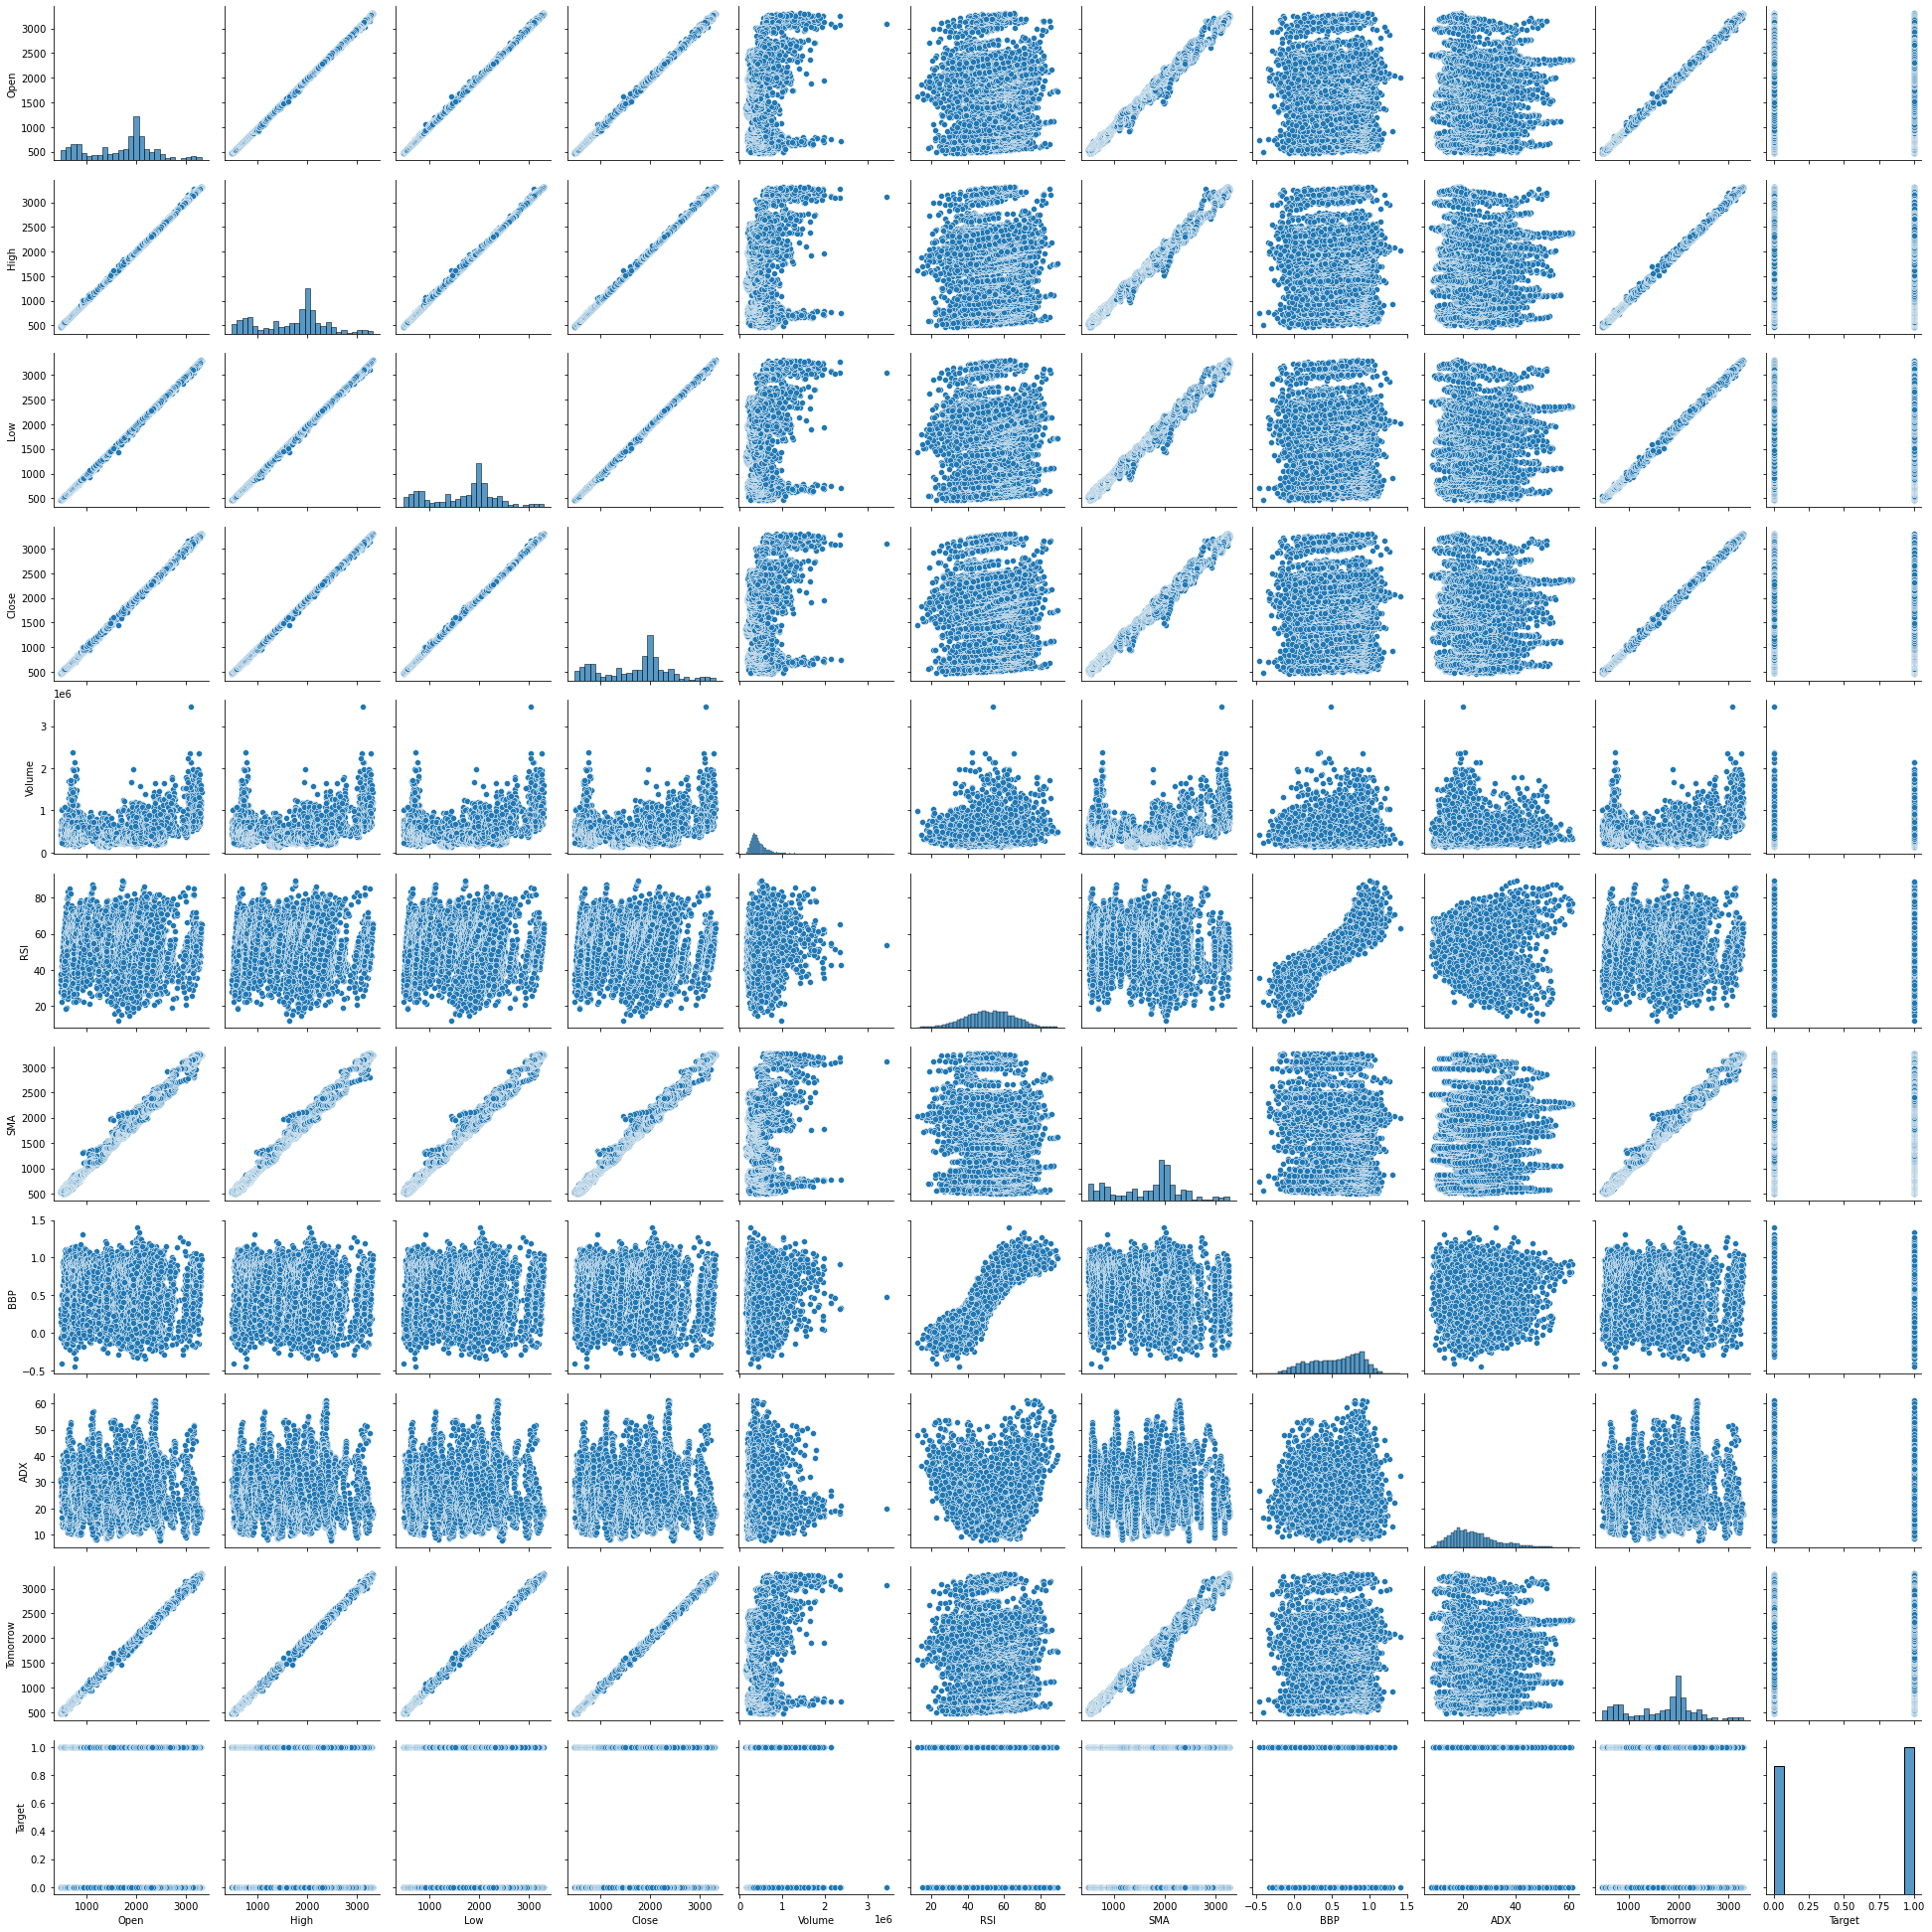

In [9]:
#(3) Your code goes here
# Plot a pairplot using the seaborn pairplot and report the patterns in the given dataset.
df_subset = df[['Close', 'Volume']]
sns.pairplot(df)


# Target is always 0 or 1, meaning it is binary.
# Histograms go along the diagonal axis with most reasonably normally distributed.
# Close, Low, High, Open and Tomorrow are all strongly positively correlated with each other. 
# SMA is also reasonably strongly positively correlated with them as well
# RSI, Volume, BBP and ADX all have datapoints all over the diagram making analysis fairly useless 
# when comparing them to Close, Low, High and Open


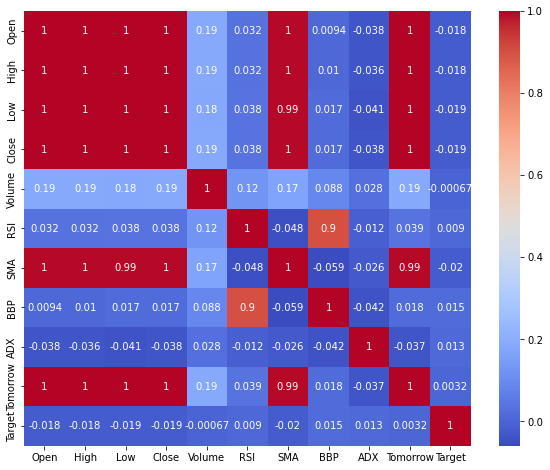

In [10]:
#(4) Your code goes here

# Assume the dataset is stored in a variable called `df`
corr_matrix = df.corr() # calculate the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidth=0.0, annot=True) # plot the correlation matrix as a heatmap
plt.show() # show the plot

#(5) Your text goes here
Based on the results you obtained in 3 and 4 above, comment on the relationships among the features present in the dataset.

Open, High, Low, Close and Tomorrow are all perfectly correlated with each other as if they were the same. their relationship to each other is as strong as their relationship to themselves.

SMA almost falls into this category but is not perfectly correlated with tomorrow.

The correlations betweek BBP, ADX, RSI and Volume and Open, High, Low, Close are so weak that there is almost no correlation.

Target has almost no correlation with anything other than itself.

BBP and RSI are highly correlated with each other but non of the other technical analysis methods are correlated with each other.

\pagebreak

# ========== Question 1.3 --- [9 marks] ==========

We here apply linear regression to predict 'Tomorrow' from 'SMA'.
For this question, you should use the sklearn implementation of Linear Regression. Use the first 80% of the data for training and the rest 20% for testing ***without shuffling***.
1. [Code] Fit a linear regression model to the training data so that we can predict 'Tomorrow' from 'SMA'. Report the estimated model parameters w and the coefficient of determination $R^2$.
2. [Text] Describe what the parameters represent for the fitted dataset with the linear regression model.
3. [Code] Report the root mean-square error (RMSE) for the training set and test set, respectively.
4. [Code] Plot predicted values versus actual values for the test set, where the x-axis corresponds to actual values and the y-axis to predicted values. Draw a line of $y=x$ on the plot.
5. [Code] Plot 'Tomorrow' versus 'SMA' for the training set and display the regression line on the same graph. The x-axis corresponds to 'SMA' and the y-axis to 'Tomorrow'.
6. [Text] Examining the results (e.g. $R^2$ and RMSE), comment on the predictability of the model.

\pagebreak
## Your answers for Question 1.3

In [11]:
#(1) Your code goes here

# Find the X and y variables.
X = df[['SMA']].values.reshape(-1,1)
y = df[['Tomorrow']].values

# Get your train and test sets for the X and y variables with a train size of 80% and test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, shuffle=False)



# Fitting a simple linear regression
lm = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lm.fit(X_train, y_train)
print('Training accuracy: {:.4f}'.format(lm.score(X_train, y_train)))

# Reporting r^2 and w
y_test_pred = lm.predict(X_test)

# Calculating the coefficient of determination and weight vector.
# r2 = r2_score(y_test, y_test_pred)

w = lm.coef_[0]
print("Estimated model parameters:")
print(f'w = {w}')
# print("𝑅2 = {:.4f}".format(r2))

# i think i need R-squared for both SMA and Tomorrow.

Training accuracy: 0.9899
Estimated model parameters:
w = [1.00059376]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


#(2) Your text goes here

Describe what the parameters represent for the fitted dataset with the linear regression model.


w is the slope of the regression line. meaning how much the SMA supposedly affects Tomorrow's price

R^2 is how much SMA explains Tomorrow. if R^2 = 1, then SMA supposedly fully explains Tomorrow but this factor does not take into consideration causation.











In [12]:
#(3) Your code goes here
# Report the root mean-square error (RMSE) for the training set and test set, respectively.

# Find your predicted y for both training and test sets.
y_train_predict = lm.predict(X_train) 
y_test_predict = lm.predict(X_test)

# Find MSE for both train and test sets
MSE_train = mean_squared_error(y_test, y_test_predict)
MSE_test = mean_squared_error(y_train, y_train_predict)

# Find RMSE for both train and test sets.
RMSE_train = math.sqrt(MSE_train)
RMSE_test = math.sqrt(MSE_test)

print("Root Mean Squared Errors:\n")
print(f'RMSE train = {RMSE_train}')
print(f'RMSE test = {RMSE_test}')


Root Mean Squared Errors:

RMSE train = 101.80752165314603
RMSE test = 57.840468817645046


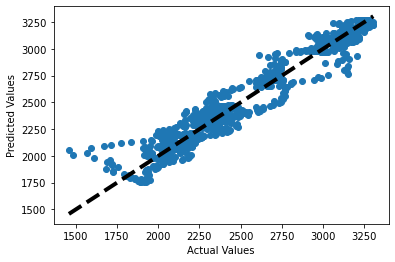

In [13]:
#(4) Your code goes here
# Plot predicted values versus actual values for the test set, where the x-axis corresponds to actual values and 
# the y-axis to predicted values. Draw a line of  𝑦=𝑥 on the plot.

# Create plot
def fit_scatter(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    
# Calculate predicted values.    
prediction = lm.predict(X_test)

# fit your predicted values and test values to the scatterplot.
fit_scatter(y_test, prediction)

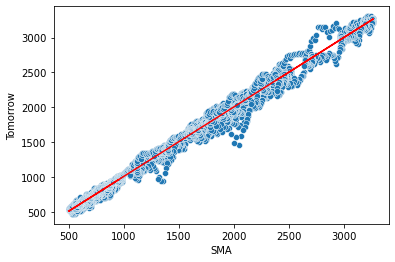

In [14]:
#(5) Your code goes here
# Plot 'Tomorrow' versus 'SMA' for the training set and display the regression line on the same graph. 
# The x-axis corresponds to 'SMA' and the y-axis to 'Tomorrow'

# Fitting a linear regression line into the data
X = df[['SMA']]
y = df['Tomorrow']
model = LinearRegression()
model.fit(X, y)

# Adding a regression line to the scatterplot
sns.scatterplot(data=df, x='SMA', y='Tomorrow')
plt.plot(X, model.predict(X), color='r')


#(6) Your text goes here

R^2 = 0.9885

RMSE train = 70.70801085191155

RMSE test = 68.39342465981098

the model likely has a very strong ability to predict the values of tomorrow as evidenced by the strong positive correlation in both plots and the R^2 value. without normalising the RMSE values are difficult to use to explain. a dataset with a range of values up to 1,000,000 will have very different RMSE meaning than one with values going up to 10,000. The RMSE values seem to be good though.

\pagebreak

# ========== Question 1.4 --- [5 marks] ==========

1. [Code] Instead of using libraries for linear regression, write the code of your own for finding the regression coefficients of the regression model that predicts 'Tomorrow' from 'SMA'. Run your code and show the coefficients, where you should use the same training data as Question 1.3.
2. [Text] One of the common metric used for evaluating the performance of regression models is Mean Squared Error (MSE). Write out the expression for MSE and list one of its limitations and how it can be addresses with alternative metrics.

\pagebreak
## Your answers for Question 1.4

In [15]:
# Calculate the mean of 'SMA' and 'Tomorrow' in the training set
X_mean = np.mean(X_train)
y_mean = np.mean(y_train)

# Calculate the total number of data points in the training set
n = len(X_train)

# Calculate the numerator and denominator of the slope of the regression line
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X_train[i] - X_mean) * (y_train[i] - y_mean)
    denominator += (X_train[i] - X_mean) ** 2

slope = numerator / denominator

# Calculate the y-intercept of the regression line
intercept = y_mean - slope * X_mean

# # Print the coefficients
print(f'Slope: {slope[0]:.4f}')
print(f'Intercept: {intercept[0]:.4f}')

Slope: 1.0006
Intercept: 4.3423


#(2) Your text goes here

MSE = (1/n) * Σ(y_i - ŷ_i)^2

MSE is very sensitive to outliers. this is because of the squared term exacerbating the power of these terms. 100(1^2) is the same size as 1(10^2), therefore one outlier has as much power as 100 results close to the expected value.

Mean Absolute Error is an alternative approach 

MAE calculates the average absolute differences between the actual and predicted values making it less sensitive to outliers compared with MSE. therefore the model becomes more robust.

\pagebreak

# ========== Question 1.5 --- [6 marks] ==========
#### Multiple linear regression and polynomial regression

We here consider multiple linear regression that employs four variables ('RSI', 'SMA', 'BBP', 'ADX') to predict 'Tomorrow'. We use the same training data and test data as Question 1.3.
1. [Code] Train the multiple linear regression model on the training set and show the model parameters and the coefficient of determination $R^2$. You also show the RMSE for the training set and test set respectively.
2. [Code] We now extend the model to the polynomial regression model, in which we use all polynomial combinations of the variables up to the specified degree $p$. Using $p=2$, run an experiment in the same manner as 1 above and report the model parameters and $R^2$. You also report the RMSE for the training and test sets respectively. You should use the sklearn implementation of Linear Regression and Polynomial Features. 
3. [Text] Comparing the results you obtained here and those in Question 1.3, report your findings and give discussions briefly.

\pagebreak
## Your answers for Question 1.5

In [16]:
#(1) Your code goes here
#Version where you supposedly turn X and y into arrays.
#(1) Your code goes here

X = df[['RSI', 'SMA', 'BBP', 'ADX' ]]
y = df[['Tomorrow']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)


# Fitting a simple linear regression according to the labs
# Student needs to provide code similar to below
lm = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lm.fit(X_train, y_train)
print('Training accuracy: {:.3f}'.format(lm.score(X_train, y_train)))

# Report r^2 and w
# Get predictions for y_test and y-train
y_train_predict = lm.predict(X_train) 
y_test_predict = lm.predict(X_test)  # .values.reshape(-1,1) was deleted from all x_train and X-test things to corect something.

# Calculate the coefficient of determinations and the weights vector.
r2 = r2_score(y_test, y_test_pred)

w = lm.coef_[0]
print("Estimated model parameters:")

print(f'w = {w}')
print("𝑅2 = {:.4f}\n".format(r2))



# Show the RMSE for the training set and test set respectively
# Find MSE for both train and test sets
MSE_train = mean_squared_error(y_test, y_test_predict)
MSE_test = mean_squared_error(y_train, y_train_predict)

# Find RMSE for both train and test sets.
RMSE_train = math.sqrt(MSE_train)
RMSE_test = math.sqrt(MSE_test)

print("Root Mean Squared Errors:")
print(f'RMSE train = {RMSE_train}')
print(f'RMSE test = {RMSE_test}')


Training accuracy: 0.997
Estimated model parameters:
w = [  4.85991511   1.0001976  -10.00270212  -0.79391668]
𝑅2 = -1.7252

Root Mean Squared Errors:
RMSE train = 37.08861576138641
RMSE test = 36.52923813169257


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [17]:
#(2) Your code goes here
# Assuming X_train, y_train, X_test, y_test are already defined

# P = 2 due to specification of question.
P = 2
poly = PolynomialFeatures(degree=P)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Geting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Predicting the training and test sets
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Calculating R-squared for training and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculating RMSE for training and test sets in another way so i can remember both methods. 
# don't want to replace previous ones as they may have advantages later.
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Print the results
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("R-squared (training):", r2_train)
print("R-squared (test):", r2_test)
print("RMSE (training):", rmse_train)
print("RMSE (test):", rmse_test)



Coefficients: [[ 0.00000000e+00  1.45852080e+00  9.05094142e-01  9.25828133e+01
  -2.15497940e+00 -8.97907790e-03  1.81022302e-03 -2.00196376e+00
   6.90167807e-02  1.01907872e-06 -1.16609248e-02  2.30751577e-04
   5.49980433e+01 -7.48903795e-01 -3.42774023e-02]]
Intercept: [-58.84436014]
R-squared (training): 0.9975656867018934
R-squared (test): 0.9975433370403973
RMSE (training): 33.01320123312078
RMSE (test): 32.67632488057729


#(3) Your text goes here

1.3 results
R^2 = 0.9885
RMSE train = 70.70801085191155
RMSE test = 68.39342465981098

1.5.1 results
𝑅2 = 0.9885
RMSE train = 37.08861576138641
RMSE test = 36.52923813169257

1.5.2
R-squared (training): 0.9975656867018934
R-squared (test): 0.9975433370403973
RMSE (training): 33.01320123312078
RMSE (test): 32.67632488057729

the RMSE for both Linear and Multiple regression calculated here are far lower than that of 1.3, therefore, these have less deviations between their actual values and predicted values.

The R-squared values are also equivalent or higher in 1.5 than 1.3.

\pagebreak

# ========== Question 1.6 --- [12 marks] ==========
#### Classification

We now consider the prediction of stock price movement as a binary classification problem - class 1 for upward movement and class 0 otherwise. We use the four technical Indicators, 'RSI', 'SMA', 'BBP', 'ADX', as input features to a classifier to predict 'Target'.

1. [Code] Using 10-fold cross validation with ***no shuffling***, train four classifiers, Logistic Regression, SVM, Decision Trees, and Random Forests. Display, in a single graph, the test (i.e. validation) accuracy with boxplot for each model. For each model, you also report the mean accuracy and mean F-score for the training set and test set, respectively.
(NB: You should obtain the accuracy and F-score for each trial of k-fold cross validation, which will be used for plotting a boxplot. A mean value/score denotes the average value over the $k$ trials, where $k=10$).
<br> ***Note***: you should use sklearn's KFold, SVC, DecisionTreeClassifier, RandomForestClassifier, and LogisticRegression. For each classification model, use default parameters except that "***random_state=0***" should be specified.
2. [Code] Further to the above, for each model, display the confusion matrix for the validation sets, where rows correspond to true class labels and columns to predicted ones, and each element of the matrix shows the number of corresponding instances.
3. [Text] Comment on which model is best with respect to false positives and false negatives. 


\pagebreak
## Your answers for Question 1.6

LR Mean training accuracy: 0.5362041763161031
LR Mean test accuracy: 0.5340217412632695
LR Mean test F-score: 0.6944882009735154
LR Mean train F-score: 0.6964508474790623
SVM Mean training accuracy: 0.5362287826063656
SVM Mean test accuracy: 0.5362375645075839
SVM Mean test F-score: 0.6976235727808086
SVM Mean train F-score: 0.6981044843224832
DTC Mean training accuracy: 1.0
DTC Mean test accuracy: 0.5171707905735534
DTC Mean test F-score: 0.5437685362671518
DTC Mean train F-score: 1.0
RFC Mean training accuracy: 1.0
RFC Mean test accuracy: 0.5213865941957891
RFC Mean test F-score: 0.5706316154781836
RFC Mean train F-score: 1.0


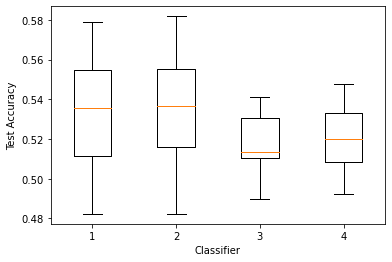

In [18]:
# Specifying the data i am tring to predict y and the data i am using to predicty y which is X
X = df[['RSI', 'SMA', 'BBP', 'ADX']]
y = df[['Target']]

# creating the model with a 80/20 split and no randomisation or shuffling.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, shuffle = 0)

# Creating 10 cross validations
kf = KFold(n_splits=10, shuffle=False)

# a dictionary of all the different models.
classifiers = {
    "LR": LogisticRegression(random_state=0),
    "SVM": SVC(random_state=0),
    "DTC": DecisionTreeClassifier(random_state=0),
    "RFC": RandomForestClassifier(random_state=0)
}

# creating an empty list for classifier test accuracies.
classifier_test_accs = []

# Running the model through all the different classifiers and storing the results.
for classifier_name, classifier in classifiers.items():
    train_accs, test_accs, test_fscores, train_fscores = [[] for _ in range(4)]
    
    # Training and testing all the classifiers through all the folds.
    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # reducing the dimensionality of the y_train and y_test to make it run easier.
        y_train_fold = np.ravel(y_train_fold)
        y_test_fold = np.ravel(y_test_fold)

        # fit the classifier
        classifier.fit(X_train_fold, y_train_fold)

        # Creating the predictions of the classifiers.
        train_pred = classifier.predict(X_train_fold)
        test_pred = classifier.predict(X_test_fold)

        # creating the accuracies of the trains and tests
        train_acc = accuracy_score(y_train_fold, train_pred)
        test_acc = accuracy_score(y_test_fold, test_pred)
        train_fs = f1_score(y_train_fold, train_pred)
        test_fs = f1_score(y_test_fold, test_pred)

        # appending the trains and tests
        train_accs.append(train_acc)
        test_accs.append(test_acc)
        test_fscores.append(test_fs)
        train_fscores.append(train_fs)

    # finding the mean of the tests and accuracies between all the folds.
    mean_train_acc = np.mean(train_accs)
    mean_test_acc = np.mean(test_accs)
    mean_test_fs = np.mean(test_fscores)
    mean_train_fs = np.mean(train_fscores)

    # Print the mean accuracy and F-score for the training and test sets for this classifier
    print(f"{classifier_name} Mean training accuracy:", mean_train_acc)
    print(f"{classifier_name} Mean test accuracy:", mean_test_acc)
    print(f"{classifier_name} Mean test F-score:", mean_test_fs)
    print(f"{classifier_name} Mean train F-score:", mean_train_fs)

    # appending the classifier test accuracies
    classifier_test_accs.append(test_accs)


# Plot the test accuracy for each classifier using a boxplot
plt.boxplot(classifier_test_accs)
plt.xlabel("Classifier")
plt.ylabel("Test Accuracy")
plt.show()

LR Confusion Matrix:



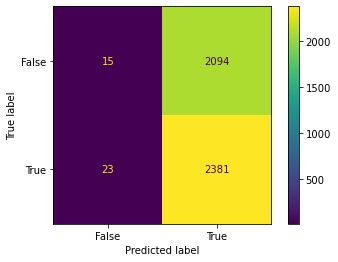

SVM Confusion Matrix:



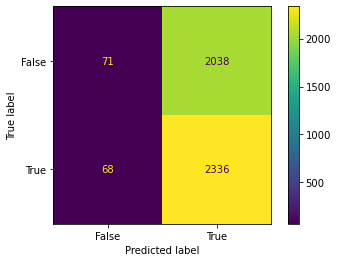

DTC Confusion Matrix:



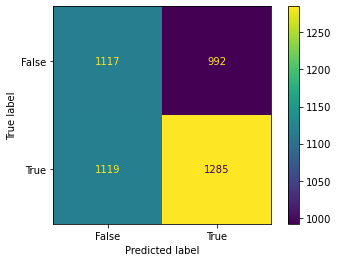

RFC Confusion Matrix:



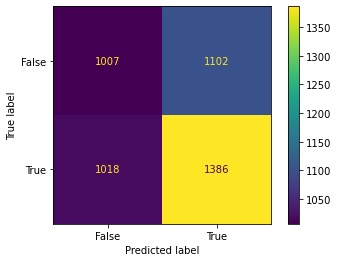

In [19]:
# Specifying the data i am trying to predict y and the data i am using to predict y which is X
X = df[['RSI', 'SMA', 'BBP', 'ADX']]
y = df[['Target']]

# re imported to avoid any confusions the code may have.
from sklearn.metrics import confusion_matrix


# a dictionary of all the different models.
classifiers = {
    "LR": LogisticRegression(random_state=0),
    "SVM": SVC(random_state=0),
    "DTC": DecisionTreeClassifier(random_state=0),
    "RFC": RandomForestClassifier(random_state=0)
}

# creating the model with a 80/20 split and no shuffling.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, shuffle= False)

    
# Running the model through all the different classifiers and storing the results.
for classifier_name, classifier in classifiers.items():
    kfold = KFold(n_splits=10, shuffle=False)
    train_accs, test_accs, test_fscores = [[] for _ in range(3)]
    results = []
    
    # Training and testing all the classifiers through all the folds.
    for a, (train_index, test_index) in enumerate(kfold.split(X_train)):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # reducing the dimensionality of the y_train and y_test to make it run easier.
        y_train_fold = np.ravel(y_train_fold)
        y_test_fold = np.ravel(y_test_fold)

        # fit the classifier
        classifier.fit(X_train_fold, y_train_fold)

        # Creating the predictions of the classifiers.
        test_pred = classifier.predict(X_test_fold)
 
        # Creating the confusion matrix for this fold
        cm = confusion_matrix(y_test_fold, test_pred)
        results.append(cm)


    # appending the classifier test accuracies
    classifier_test_accs.append(test_accs)
    
    # Compute the confusion matrix for the test fold
    print(f"{classifier_name} Confusion Matrix:\n")
    
    final = np.sum(results, axis = 0)
    
#     confusion_matrix = metrics.confusion_matrix(y_test_fold, test_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = final, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    

#(3) Your text goes here

false positives and false negatives.

LR and SVM both predict true almost always and so therefore should not be considered good classifiers. both have 2091 false negatives compared to 2422 true negatives. They have no True Positives or True Negatives and so should by their nature be disqualified as the best model.


DTC and RFC are now both in the running. DTC has 2402 correct predictions and 2111 incorrect predictions meaning that out of all decisions 0.5322 are correct. while RFC has 2393 correct predictions and 2120 incorrect predictions meaning that 0.5302 decisions are correct.

therefore Decision Trees classifier is the best method for correctly predicting more true positives and negatives relative to false positives and negatives 



\pagebreak

# ========== Question 1.7 --- [5 marks] ==========
#### Dimensionality Reduction 
Here we will perform dimensionality reduction with PCA to the data and run classification experiments on the dimensionality reduced data.

1. [Code] Using the four technical features ('RSI', 'SMA', 'BBP', 'ADX') as input data, apply PCA to the whole data and find the minimum set of principal components that explains at least 95% of the variance of the data. Report the number of principal components in the set you found.
2. [Code] Using the set of principal components you found above, reduce the dimensionality of the data and run classification experiments for the four classifiers in the same manner as we did in Question 1.6, but we now use the dimensionality-reduced data instead. You should plot boxplots and report accuracy and F-score in the same manner as Question 1.6. (Note that this experiment is not a formal one, as we apply PCA to the whole data, whose subset is used for testing.)
3. [Text] Comparing the results with those you obtained in Question 1.6, report your findings and give brief discussions.


\pagebreak
## Your answers for Question 1.7

In [20]:
#(1) Your code goes here

data = df[['RSI', 'SMA', 'BBP', 'ADX' ]]

# Using PCA to explain 95% of the variance
pca = PCA(n_components=0.95)
X_2d = pca.fit_transform(X)

# Calculating the explained variance ratio of each principal component
explained_var_ratio = pca.explained_variance_ratio_


# Calculating the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# Finding the index of the last principal component that exceeds 95% variance
n_components = np.argmax(cumulative_var_ratio > 0.95) + 1

# Printing the result
print(f"The minimum set of principal components that explains at least 95% of the variance is {n_components}")



The minimum set of principal components that explains at least 95% of the variance is 1


LR Mean training accuracy: 0.5326833793026605
LR Mean test accuracy: 0.5326849871475384
LR Mean test F-score: 0.6945166155384785
LR Mean train F-score: 0.6950917172334563


/tmp/ipykernel_242/4106044343.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  X_2d_train_fold, X_2d_test_fold = X_2d_train[[train_index]], X_2d_train[[test_index]] #X_2d_train.iloc worked for previous ones but these are now numpy.
/tmp/ipykernel_242/4106044343.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  X_2d_train_fold, X_2d_test_fold = X_2d_train[[train_index]], X_2d_train[[test_index]] #X_2d_train.iloc worked for previous ones but these are now numpy.
/tmp/ipykernel_242/4106044343.py:29: FutureWarning: Using a non-tuple se

SVM Mean training accuracy: 0.5338650632022174
SVM Mean test accuracy: 0.525811372956851
SVM Mean test F-score: 0.644618397445418
SVM Mean train F-score: 0.6940828269560481
DTC Mean training accuracy: 1.0
DTC Mean test accuracy: 0.5085292270863175
DTC Mean test F-score: 0.5237157242466727
DTC Mean train F-score: 1.0


/tmp/ipykernel_242/4106044343.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  X_2d_train_fold, X_2d_test_fold = X_2d_train[[train_index]], X_2d_train[[test_index]] #X_2d_train.iloc worked for previous ones but these are now numpy.
/tmp/ipykernel_242/4106044343.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  X_2d_train_fold, X_2d_test_fold = X_2d_train[[train_index]], X_2d_train[[test_index]] #X_2d_train.iloc worked for previous ones but these are now numpy.
/tmp/ipykernel_242/4106044343.py:29: FutureWarning: Using a non-tuple se

RFC Mean training accuracy: 0.9995568503511988
RFC Mean test accuracy: 0.5085292270863175
RFC Mean test F-score: 0.5237157242466727
RFC Mean train F-score: 0.9995851481123342


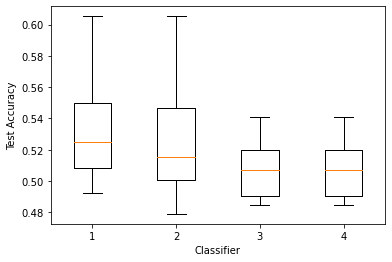

In [21]:
# #(2) Your code goes here

X_2d = pca.fit_transform(X)
y = df[['Target']]

# 80/20 split no randomisation or shuffling.
X_2d_train, X_2d_test, y_train, y_test = train_test_split(X_2d, y, train_size=0.8, test_size=0.2, shuffle= False)

# 10 cross validations.
kf = KFold(n_splits=10, shuffle=False)

# dictionary of all the different models.
classifiers = {
    "LR": LogisticRegression(random_state=0),
    "SVM": SVC(random_state=0),
    "DTC": DecisionTreeClassifier(random_state=0),
    "RFC": RandomForestClassifier(random_state=0)
}

# empty list for classifier test accuracies.
classifier_test_accs = []

# Running the model through all the different classifiers and storing the results.
for classifier_name, classifier in classifiers.items():
    train_accs, test_accs, test_fscores, train_fscores = [[] for _ in range(4)]
    
    # training and testing all the classsifiers and storing the results.
    for train_index, test_index in kf.split(X_train):
        X_2d_train_fold, X_2d_test_fold = X_2d_train[[train_index]], X_2d_train[[test_index]] #X_2d_train.iloc worked for previous ones but these are now numpy.
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # reduce the dimensionality of the folds for a python reason.
        y_train_fold = np.ravel(y_train_fold) 
        y_test_fold = np.ravel(y_test_fold)

        # fit the classifier
        classifier.fit(X_2d_train_fold, y_train_fold)

        # creating the predictions of the classifiers.
        train_pred = classifier.predict(X_2d_train_fold)
        test_pred = classifier.predict(X_2d_test_fold)

        # creating the accuracies of the trains and tests
        train_acc = accuracy_score(y_train_fold, train_pred)
        test_acc = accuracy_score(y_test_fold, test_pred)
        train_fs = f1_score(y_train_fold, train_pred)
        test_fs = f1_score(y_test_fold, test_pred)

        # appending the trains and tests with new info
        train_accs.append(train_acc)
        test_accs.append(test_acc)
        test_fscores.append(test_fs)
        train_fscores.append(train_fs)

    # finding the mean of the tests and accuracies between all the folds.
    mean_train_acc = np.mean(train_accs)
    mean_test_acc = np.mean(test_accs)
    mean_test_fs = np.mean(test_fscores)
    mean_train_fs = np.mean(train_fscores)

    # Print the mean accuracy and F-score for the training and test sets for this classifier
    print(f"{classifier_name} Mean training accuracy:", mean_train_acc)
    print(f"{classifier_name} Mean test accuracy:", mean_test_acc)
    print(f"{classifier_name} Mean test F-score:", mean_test_fs)
    print(f"{classifier_name} Mean train F-score:", mean_train_fs)

    classifier_test_accs.append(test_accs)


# Plot the test accuracy for each classifier using a boxplot
plt.boxplot(classifier_test_accs)
plt.xlabel("Classifier")
plt.ylabel("Test Accuracy")
plt.show()

#(3) Your text goes here


The results are the same for LR and SVM between 1.6.1 and 1.7.2

DTC has a mean training accuracy and train f score of 1 in both 1.6 and 1.7. therefore PCA does not affect the ability of DTC to present fscore and training accuracy.

RFC decreased over all metrics slightly, DTC increased slightly over some metrics decreased over others, SVM slightly better over all metrics, LR slightly decreased among all metrics.

PCA has not had drastic effects on the test accuracies of the data and has had mixed effects across the different methods. overall it has slightly decreased the performance of all the tests.



Dimensionality reduction reduces the number of features used to explain the data, in doing so it naturally loses some of its explainable variance. so for 1.7, we claim that we are willing to accept a 5% reduction in the total amount of variance explainable by the features leading to the reduced Mean test accuracy and f scores in DTC and RFC. although these differences will by no stretch of the imagination will be statistically significant.

the best would be SVM as it slightly increased due to PCA over all the accuracy tests we did.

\pagebreak

# ========== Question 1.8 --- [15 marks] ==========


We considered only four technical features so far to find that movement classification with the four classifiers is challenging.
We would like to know whether we could improve the performance if we use more features, apply preprocessing to the data, and tune up model parameters.
To find some answer to the question, carry out a mini project with the following conditions:
* We use another data set file ("dset_q1b.csv") for this project, which is an extended version of the original one and contains 15 technical indicators. Load the dataset in the following manner:
>   df1b = pd.read_csv("dset_q1b.csv", index_col="Date")
* We consider SVM (SVC) only.
* We split the data into two subsets without shuffling - the first 80% of data should be used for training and validation, and the remaining 20% for testing. 
* We will limit the duration of the project to a few hours only.
* The outcome of the project is not necessarily positive. It is not surprising that you cannot find much improvement.

1. [Text] Describe your ideas for improving the classification performance. Your ideas should be concrete and feasible - the project should be done in the specified time length.
2. [Code and text] Implement your ideas, run experiments, and report the results including accuracy and F-score for the training set and test set respectively.
3. [Code and text] Examine whether your improvement or deterioration is statistically significant.
4. [Text] Summarise your findings and show your answer to the question. In case of negative results, explain the reasons for the negative outcomes.

\pagebreak
## Your answers for Question 1.8

#(1) Your text goes here


I will first Normalise the data to avoid any issues with extreme values having too much impact on my machine learning model, especially with my use of PCA later on.

I will then Use PCA for feature selection and will choose the Principal Components which explain the most about the variation in my dataset removing redundant or irrelevant features. Thereby doing feature selection to get rid of features which are not helpful and finding which principal components are the most useful.

Once i have selected the number of principal components, i will the cycle the model through three separate activation functions to find which one best fits the data.


In [22]:
df1b = pd.read_csv("dset_q1b.csv", index_col="Date")

Linear Training accuracy: 0.5332594235033259
Linear Test accuracy: 0.5203900709219859
Linear Train F-score: 0.639369539146822
Linear Test F-score: 0.605972323379461
Linear Confusion Matrix:



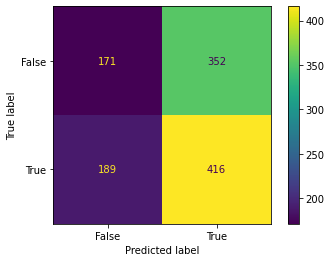

RBF Training accuracy: 0.5330376940133038
RBF Test accuracy: 0.5363475177304965
RBF Train F-score: 0.6954006363899334
RBF Test F-score: 0.6982111944604733
RBF Confusion Matrix:



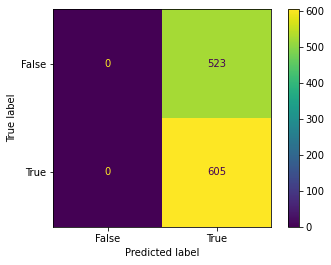

Polynomial Training accuracy: 0.5330376940133038
Polynomial Test accuracy: 0.5363475177304965
Polynomial Train F-score: 0.6954006363899334
Polynomial Test F-score: 0.6982111944604733
Polynomial Confusion Matrix:



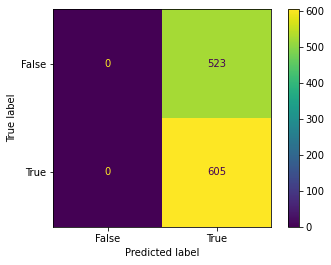

In [23]:
# No attempts at improving the model made here. this is to be used as a baseline
X = df1b[["RSI", "SMA", "BBP", "ADX", "MACD", "BOP", "ROC", "PPO", "WMA", "KAMA", "CCI", "aarondown", "aaronup", "stochk", "stochd"]]
y = df1b[['Target']]

# Assuming X is your feature matrix and y is your target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


# Now do the SVM model with three different activation functions to see which brings the best results.
kernels = {
    "Linear": SVC(kernel='linear', C=1, random_state=0),
    "RBF": SVC(kernel='rbf', C=1, random_state=0),
    "Polynomial": SVC(kernel='poly', C=1, random_state=0),
}

kernel_train_accs_orig, kernel_test_accs_orig, kernel_train_fscores_orig, kernel_test_fscores_orig = [[] for _ in range(4)]
for kernel_name, kernel in kernels.items():
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)

    kernel.fit(X_train, y_train)

    train_pred = kernel.predict(X_train)
    test_pred = kernel.predict(X_test)

    train_acc_orig = accuracy_score(y_train, train_pred)
    test_acc_orig = accuracy_score(y_test, test_pred)
    train_fs_orig = f1_score(y_train, train_pred)
    test_fs_orig = f1_score(y_test, test_pred)

    kernel_train_accs_orig.append(train_acc_orig)
    kernel_test_accs_orig.append(test_acc_orig)
    kernel_train_fscores_orig.append(train_fs_orig)
    kernel_test_fscores_orig.append(test_fs_orig)

    # Print the mean accuracy and F-score for the training and test sets for this classifier
    print(f"{kernel_name} Training accuracy:", train_acc_orig)
    print(f"{kernel_name} Test accuracy:", test_acc_orig)
    print(f"{kernel_name} Train F-score:", train_fs_orig)
    print(f"{kernel_name} Test F-score:", test_fs_orig)
    
    kernel_test_accs_orig.append(test_accs)
    
    # Compute the confusion matrix for the test fold
    print(f"{kernel_name} Confusion Matrix:\n")
    
    confusion_matrix = metrics.confusion_matrix(y_test, test_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()



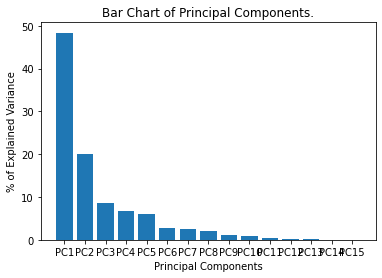

Linear Training accuracy: 0.5330376940133038
Linear Test accuracy: 0.5363475177304965
Linear Train F-score: 0.6954006363899334
Linear Test F-score: 0.6982111944604733
Linear Confusion Matrix:



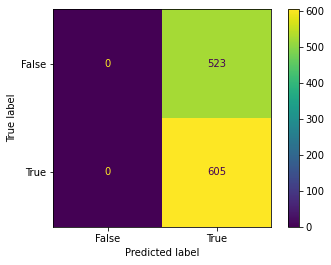

RBF Training accuracy: 0.5454545454545454
RBF Test accuracy: 0.5390070921985816
RBF Train F-score: 0.6826625386996904
RBF Test F-score: 0.6242774566473989
RBF Confusion Matrix:



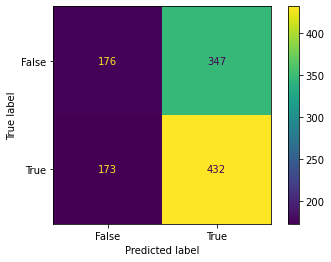

Polynomial Training accuracy: 0.5330376940133038
Polynomial Test accuracy: 0.5363475177304965
Polynomial Train F-score: 0.6954006363899334
Polynomial Test F-score: 0.6982111944604733
Polynomial Confusion Matrix:



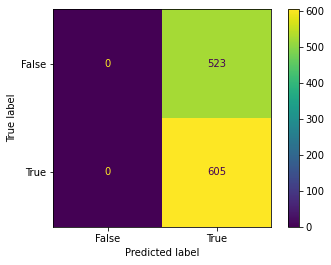

In [25]:
# Attempt at improving
X = df1b[["RSI", "SMA", "BBP", "ADX", "MACD", "BOP", "ROC", "PPO", "WMA", "KAMA", "CCI", "aarondown", "aaronup", "stochk", "stochd"]]
y = df1b[['Target']]

# Scale the data and fit it to PCA. this acts as normalising the data therefore, reducing the issues 
# caused by outliers when it comes to PCA
scaled_data = preprocessing.scale(X)
pca = PCA() 
pca.fit(scaled_data) 
pca_data = pca.transform(scaled_data)

# Display the results of each Principal Component.
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('% of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Bar Chart of Principal Components.')
plt.show()

# Now do feature selection. I will choose every Principal Component which explains over 5% of the variance
# as shown by the bar chart.
pca = PCA(n_components = 5)
pca.fit(scaled_data) 
pca_data = pca.transform(scaled_data)

# Assuming X is your feature matrix and y is your target vector
X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size=0.2, shuffle=False)


# Now do the SVM model with three different activation functions to see which brings the best results.
kernels = {
    "Linear": SVC(kernel='linear', C=1, random_state=0),
    "RBF": SVC(kernel='rbf', C=1, random_state=0),
    "Polynomial": SVC(kernel='poly', C=1, random_state=0),
}

kernel_train_accs_new, kernel_test_accs_new, kernel_train_fscores_new, kernel_test_fscores_new = [[] for _ in range(4)]
for kernel_name, kernel in kernels.items():
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)

    kernel.fit(X_train, y_train)

    train_pred = kernel.predict(X_train)
    test_pred = kernel.predict(X_test)

    train_acc_new = accuracy_score(y_train, train_pred)
    test_acc_new = accuracy_score(y_test, test_pred)
    train_fs_new = f1_score(y_train, train_pred)
    test_fs_new = f1_score(y_test, test_pred)

    kernel_train_accs_new.append(train_acc_new)
    kernel_test_accs_new.append(test_acc_new)
    kernel_train_fscores_new.append(train_fs_new)
    kernel_test_fscores_new.append(test_fs_new)

    # Print the mean accuracy and F-score for the training and test sets for this classifier
    print(f"{kernel_name} Training accuracy:", train_acc_new)
    print(f"{kernel_name} Test accuracy:", test_acc_new)
    print(f"{kernel_name} Train F-score:", train_fs_new)
    print(f"{kernel_name} Test F-score:", test_fs_new)
    
    kernel_test_accs_new.append(test_accs)
    
    # Compute the confusion matrix for the test fold
    print(f"{kernel_name} Confusion Matrix:\n")
    
    confusion_matrix = metrics.confusion_matrix(y_test, test_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

In [ ]:
from scipy.stats import ttest_ind

# Perform independent t-test
t_stat, p_val = ttest_ind(train_acc_orig, train_acc_new)

# Print results
print(f"T-statistic for train_acc: {t_stat}")
print(f"P-value: {p_val}")

# Perform independent t-test
t_stat, p_val = ttest_ind(test_acc_orig, test_acc_new)

# Print results
print(f"T-statistic for test_acc: {t_stat}")
print(f"P-value: {p_val}")

# Perform independent t-test
t_stat, p_val = ttest_ind(train_fs_orig, train_fs_new)

# Print results
print(f"T-statistic for train_fs: {t_stat}")
print(f"P-value: {p_val}")

# Perform independent t-test
t_stat, p_val = ttest_ind(test_fs_orig, test_fs_new)

# Print results
print(f"T-statistic for test fs: {t_stat}")
print(f"P-value: {p_val}")

# Cant seem to get the data.

#(4) Your text goes here
maybe do some hyperparameter tuning such as grid search for the C values and other hyperparameters such as gamma next time. Could even include the kernels into the grid search to save computing capacity.

The original data has Linear as its only viable SVM kernel because RBF and Polynomial both always predict true and so are not good models to use and any accuracy just shows how imbalanced the dataset is.

the attempt at improving the data had the only viable kernel change to RBF. Only explanation i can provide is that the transformations of the dataset through PCA and normalisation meant that RBF was the only model which could somewhat accurately predict the dataset.

train accuracy, test accuracy, train F-score and test fscore all increased showing a definite improvement on the original results therefore normalising the dataset and using PCA for feature selection and dimensionality reduction did imrpove the result and cycling through the different kernels ensured that we could find the one which best predicts the dataset on the newly transformed parameters along the Principal Components

\pagebreak

# Question 2: Experiments with image data

#### 65 marks out of 130 for this coursework

Image data are made up of $H × W × C$ pixels, where $H, W, C$ denote the height, width, and the number of channels, respectively. For simplicity, we assume a grayscale image (i.e. $C=1$). Let $p_{ij}$ denote the pixel value at a grid point $(i,j), 1 \le i \le H, 1 \le j \le W$, where $p_{11}$ corresponds to the the pixel at the top-left corner and $p_{HW}$ to the one at the bottom-right corner. We assume that $p_{ij}$ takes an integer value between 0 and 255 (i.e. 8-bit coding). In computers, we can store a grayscale image of $\{p_{ij}\}$ in a $D$-dimensional vector, $x = (x_1,x_2,...,x_D)$, where $D = H \times W$, and $x_1$ corresponds to $p_{11}$ and $x_D$ to $p_{HW}$.

In this question, we use a subset of the [Fashion MNIST Dataset](https://github.com/zalandoresearch/fashion-mnist), which contains images of fashion products from ten categories (e.g. T-shirt and trousers). The ten categories are represented as integer numbers ($0,\ldots,9$) and they are referred to as classes. There are 1000 training instances and 200 test instances per class. Each instance is a 28-by-28 grayscale image. Note that you will find some errors (e.g. incorrect labels) in the data set, but we use the data set as it is.
Load the data and apply some pre-processing in the following manner in your code.

***Loading data:***
Make sure that you have the data set file "dset_q2.mat" in your environment and run the following cell to load the data set.

In [26]:
# Load the data set and apply some preprocessing

Xtrn_org, Ytrn_org, Xtst_org, Ytst_org = load_q2_dataset()

Xtrn = np.copy(Xtrn_org) / 255.0   # Training data : (10000, 784)
Xtst = np.copy(Xtst_org) / 255.0   # Testing data : (2000, 784)
Ytrn = np.copy(Ytrn_org)           # Labels for Xtrn : (10000,)
Ytst = np.copy(Ytst_org)           # Labels for Xtst : (2000,)
Xmean = np.mean(Xtrn, axis=0)
Xtrn_mn = Xtrn - Xmean; Xtst_mn = Xtst - Xmean  # Mean-normalised versions of data


You can display the image of the fourth instance in **Xtrn** in the following manner, for example. Run the following cell.

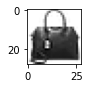

In [27]:
plt.figure(figsize=(1.0,1.0)) # You could try a much large fig size
plt.imshow(Xtrn[3,:].reshape(28,28), cmap=plt.cm.gray_r);
# plt.grid(lw=1, ls=':')
# plt.axis('off')

# ========== Question 2.1 --- [5 marks] ==========
[Code] For each class, display the grayscale images of the first five instances of the class in the training set **(Xtrn,Ytrn)**, where you should follow the specifications shown below.
- You will display a total of 50 images, which should be displayed in a 10-by-5 grid,  where a grid point $(i,j), i=0,\ldots,9, j=0,\ldots,4$,  displays the image of $j$-th instance of class $i$.  Note that we use zero-based numbering here.
- Use plt.imshow to display an image.
- Specify the figure size by plt.figure(figsize=(10, 20)).
- The image of each instance should be displayed properly in the right orientation.
- For each image, you should display the class number and the instance number in **Xtrn**, for which you could use **pyplot.title**. For example, if the first instance of class 0 is held in **Xtrn[21,:]**, the instance number is 21, so that "C0: 21" (or "0: 21") may be the information you should display.

\pagebreak
## Your answers for Question 2.1

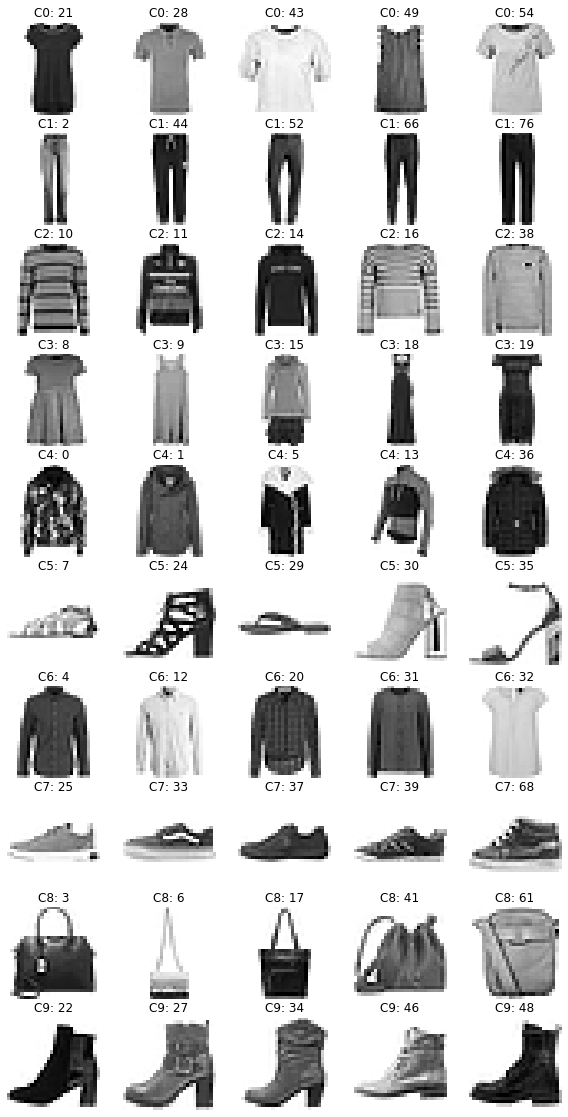

In [28]:
# Assuming Xtrn and Ytrn are properly loaded
# Create a plot
fig = plt.figure(figsize=(10, 20))

for i in range(10):
    # Get indices of instances belonging to class i
    indices = np.where(Ytrn == i)[0] 
    for j in range(5): # Display first five instances of class i
        # creating subplots
        ax = fig.add_subplot(10, 5, i*5+j+1) 
        # presenting the image
        ax.imshow(Xtrn[indices[j], :].reshape(28,28), cmap=plt.cm.gray_r) 
        # giving the title
        ax.set_title('C{}: {}'.format(i, indices[j])) 
        ax.axis('off') 
plt.show() 

\pagebreak

# ========== Question 2.2 --- [11 marks] ==========

You may have understood there is a wide variety of images in each class. We now would like to display the images of representative instances for each class in the training data set **(Xtrn, Ytrn)**. To that end, we apply the k-means clustering with $k = 6$ to each class. Instead of displaying the image of each cluster centre, which would look blurred due to averaging, we display the image of the instance that is closest to the centroid (i.e. cluster centre) as the representative of the cluster. We also display the mean image (i.e. the image of the mean vector) of each class.

[Code] Following the specifications shown below, display the result.
- For clustering, use sklearn's **KMeans** with the default parameters except that you specify **n_clusters=6** and **random_state=0**. Note that the two parameters should be specified explicitly when you run clustering for each class.
- You will display a total of 60+10=70 images, which should be displayed in a 10-by-7 grid. Each row corresponds to a class. The grid point $(i, 0)$ displays the mean image of class $i$ data, and the grid point $(i, j), j=1,\ldots,6$  displays the image of the representative of cluster $j$-1 for class $i$. Clusters should be sorted in increasing order in terms of the Euclidean distance to the centre of the class (i.e. the mean of the instances in the class), so that the column $j$=1 corresponds to the cluster that is closest to the class centre, whereas column $j$=6 to the one that is farthest from the class centre. Note that we use zero-based numbering.
- For each image of an instance, display the class number ($c$), the number of instances ($m$) in the cluster, and the instance number ($\ell$) in the training data set, in the format of "C{$c$} [{$m$}] {$\ell$}". For example, "C2 [165] 9734" represents $c$=2. $m$=165, and $\ell$=9734.
- Use a large figure size for plotting, e.g. plt.figure(figsize=(16,20)).

\pagebreak
## Your answers for Question 2.2

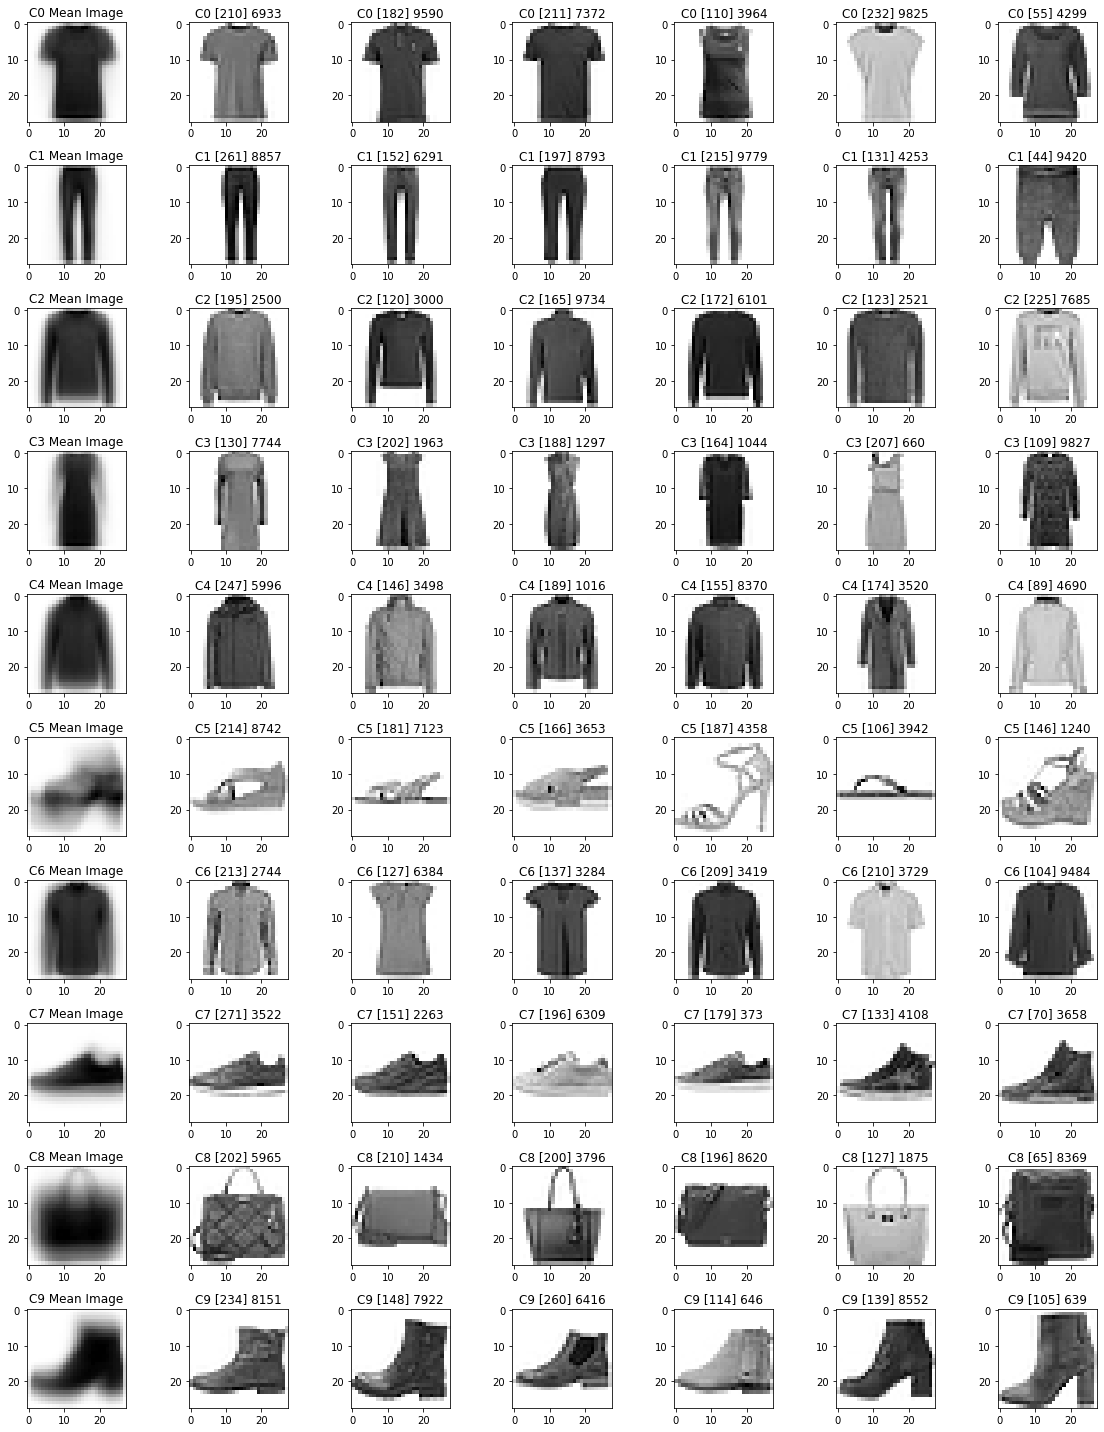

In [29]:
# Your code goes here
# we display the image of the instance that is closest to the mean of the class.
# to the centroid (i.e. cluster centre) as the representative of the cluster.

# Calculate the mean image for each class
mean_images = []

# loop ove reach class
for i in range(10):
    # get instances of examples.
    index = np.where(Ytrn == i)[0]
    X_class = Xtrn[index]
    mean_image = np.mean(X_class, axis=0)
    mean_images.append(mean_image)
    

# Creating a 10 x 7 grid of subplots
fig, axs = plt.subplots(10, 7, figsize=(16, 20))

# Looping over each class with specified parametres such as n_clusters = 6 and random state = 0
for i in range(10):
    # Get instances and apply k-means clustering
    index = np.where(Ytrn == i)[0]
    X_class = Xtrn[index]
    kmeans = KMeans(n_clusters=6, random_state=0).fit(X_class)

    
    # Calculating distances of each cluster to class mean
    distances = []
    for j in range(6):
        centroid = kmeans.cluster_centers_[j]
        dist = np.linalg.norm(centroid - mean_images[i])
        distances.append(dist)

        
    # Sorting clusters by distance to class mean
    sorted_clusters = np.argsort(distances)

    # Displaying mean image in first column
    axs[i, 0].imshow(mean_images[i].reshape(28, 28), cmap=plt.cm.gray_r)
    axs[i, 0].set_title('C{} Mean Image'.format(i))

    # Looping over each cluster and display closest instance
    for j in range(6):
        closest_index = np.argmin(np.linalg.norm(X_class[kmeans.labels_ == sorted_clusters[j]] - kmeans.cluster_centers_[sorted_clusters[j]], axis=1))
        axs[i, j+1].imshow(X_class[kmeans.labels_ == sorted_clusters[j]][closest_index].reshape(28, 28), cmap=plt.cm.gray_r)
        axs[i, j+1].set_title('C{} [{}] {}'.format(i, np.sum(kmeans.labels_ == sorted_clusters[j]), index[kmeans.labels_ == sorted_clusters[j]][closest_index]))

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

\pagebreak

# ========== Question 2.3 --- [7 marks] ==========
1. [Code] Apply Principal Component Analysis (PCA) to the data of **Xtrn_mn** using sklearn's **PCA** and show the variances of projected data for the first five principal components. 
2. [Code] Plot a graph of the cumulative explained variance ratio $r_i$ as a function of the number of principal components, $i$, where $ 1 \le i ≤ D$, $r_i$ is defined as follows, and $D$ is the number of dimensions of the data.<br>
> $$ r_i = \frac{\sum_{j=1}^i \lambda_j}{\sum_{j=1}^D \lambda_j}$$
3. [Code] Find the minimum number of principal components required to explain 50%, 60%, 70%, 80%, 90%, and 95% of the total variance, respectively.


\pagebreak
## Your answers for Question 2.3

In [30]:
#(1) Your code goes here

# Fitting the PCA model for the first 5 principal components.
pca = PCA(n_components=5) 
Xtrn_mn_pca = pca.fit_transform(Xtrn_mn)

# Printing the explained variance ratios
print(f"Explained variance ratio:{pca.explained_variance_ratio_}")


Explained variance ratio:[0.29177223 0.17701439 0.06049313 0.04971808 0.03885751]


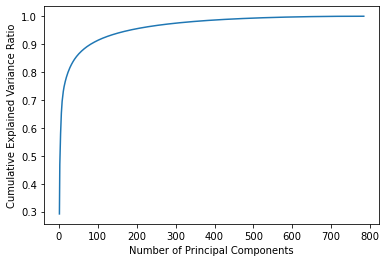

In [31]:
#(2) Your code goes here
# Plot a graph of the cumulative explained variance ratio

# Fit the PCA model for all the principal components.
pca = PCA()
Xtrn_mn_pca_nterms = pca.fit_transform(Xtrn_mn)

# calculate the cumulative variance ratio.
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative variance ratio for all principal components.
plt.plot(range(1, len(cumulative_var_ratio)+1), cumulative_var_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()



In [32]:
#(3) Your code goes here

# Creating lists.
percentages = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
min_num_components = []

# Finding the minimum number of components required to explain each degree of variation from the mean.
for p in percentages:
    index = np.argmax(cumulative_var_ratio >= p)
    min_num_components.append(index + 1)

# Printing results
for i, p in enumerate(percentages):
    print(f"Minimum number of components to explain {p*100}% of variance: {min_num_components[i]}")
    

Minimum number of components to explain 50.0% of variance: 3
Minimum number of components to explain 60.0% of variance: 5
Minimum number of components to explain 70.0% of variance: 9
Minimum number of components to explain 80.0% of variance: 24
Minimum number of components to explain 90.0% of variance: 82
Minimum number of components to explain 95.0% of variance: 182


\pagebreak

# ========== Question 2.4 --- [10 marks] ==========
We now consider a simple application of PCA, in which we (as sender A) apply dimensionality reduction to image samples and send them to someone (as receiver B) who tries to reconstruct the samples from the dimensionality-reduced samples. The underlying assumption is that the both parties, A and B, share the same set of principal components (i.e. eigen vectors) and the mean vector (**Xmean**) in advance.
You will expect some degradation in the reconstructed images.
1. [Code] Follow the instructions shown below.
- Apply PCA to the whole **Xtrn_mn** at first to find all principal components. 
- For each class and for each number of principal components $K = 5,20,50,200,400$, apply the dimensionality reduction to the first instance in the class.
- Display the reconstructed images and the original images in a 10-by-6 grid, where each row corresponds to a class (in increasing order) and the first five columns show the reconstructed images for the five values of $K$ (in increasing order) and the last column to shows the original image.
- Note that you should add **Xmean** to each reconstructed data to display the corresponding image.
2. [Text] Explain your findings briefly.

\pagebreak
## Your answers for Question 2.4

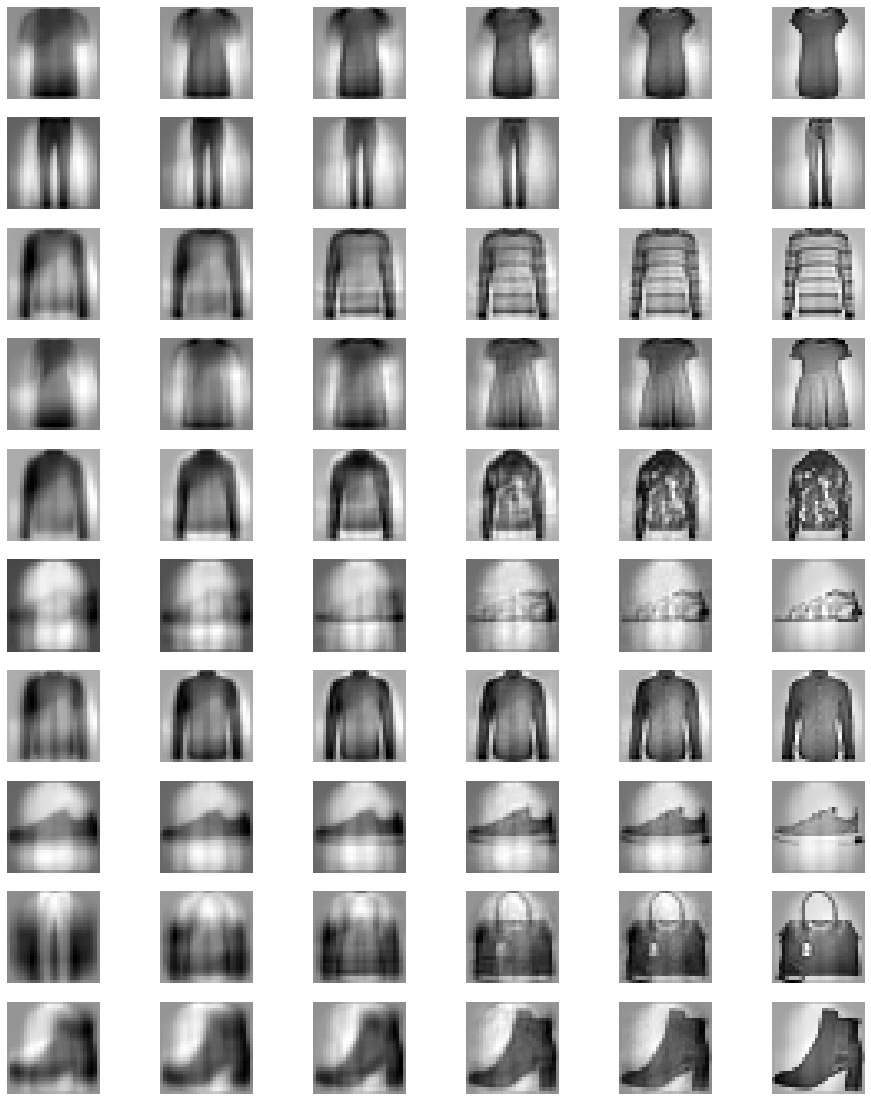

In [33]:
#(1) Your code goes here

# PCA using all principal components
pca = PCA()
X_pca = pca.fit_transform(Xtrn_mn)

# Defining the list of K values
K_list = [5, 20, 50, 200, 400]
test_fscores = [] # This is for 

# Defining the figure size
plt.figure(figsize=(16, 20))

# Looping through each class
for i in range(10):

    # Looping through each K value
    for j, K in enumerate(K_list):

        # Applying dimensionality reduction to the first instance in the class
        X_reduced = X_pca[Ytrn == i][:1, :K]

        # Reconstructing the image
        X_reconstructed = np.dot(X_reduced, pca.components_[:K, :]) + Xtrn_mn[Ytrn == i].mean(axis=0)

        # Reshaping the reconstructed image
        X_reconstructed = X_reconstructed.reshape((28, 28))

        # Plotting the reconstructed image
        plt.subplot(10, 6, i*6+j+1)
        plt.imshow(X_reconstructed, cmap=plt.cm.gray_r)
        plt.axis('off')

    # Plotting the original image
    plt.subplot(10, 6, i*6+6)
    plt.imshow(Xtrn_mn[Ytrn == i][0].reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.axis('off')

# Displaying the plot
plt.show()

#(2) ***Your text goes here***

Due to the dimensionality reduction the reconstructed images lack some of the explainable variation required to 100% reconstruct the image. by going through lower dimensions they lose pieces of information which are important in recreating an exact copy of the bitmaps.

therefore by dimensionaly reducing their images they cannot fully reconstruct the same images, they can just achieve a blurrier version of the original imange with reduced quality.

\pagebreak

# ========== Question 2.5 --- [6 marks] ==========

We now would like to know how the training data **Xtrn_mn** distribute in a vector space. To visualise distributions, we reduce the dimensionality of the data to two dimensions using PCA and plot the dimensionality-reduced data on the two-dimensional plane spanned by the first principal components. Note that each instance in the data set is now displayed as a single point on the plane.
1. [Code] Plot all the training instances (**Xtrn_mn**) on the two-dimensional PCA plane, where each instance is displayed as a small point with a colour specific to the class of the instance. Use the ’tab10’ colormap for plotting (i.e. cmap="tabl10"), and adjust the marker size so that points do not overlap each other very much.
2. [Text] Give comments on the separation of the classes, and explain your findings briefly.


\pagebreak
## Your answers for Question 2.5

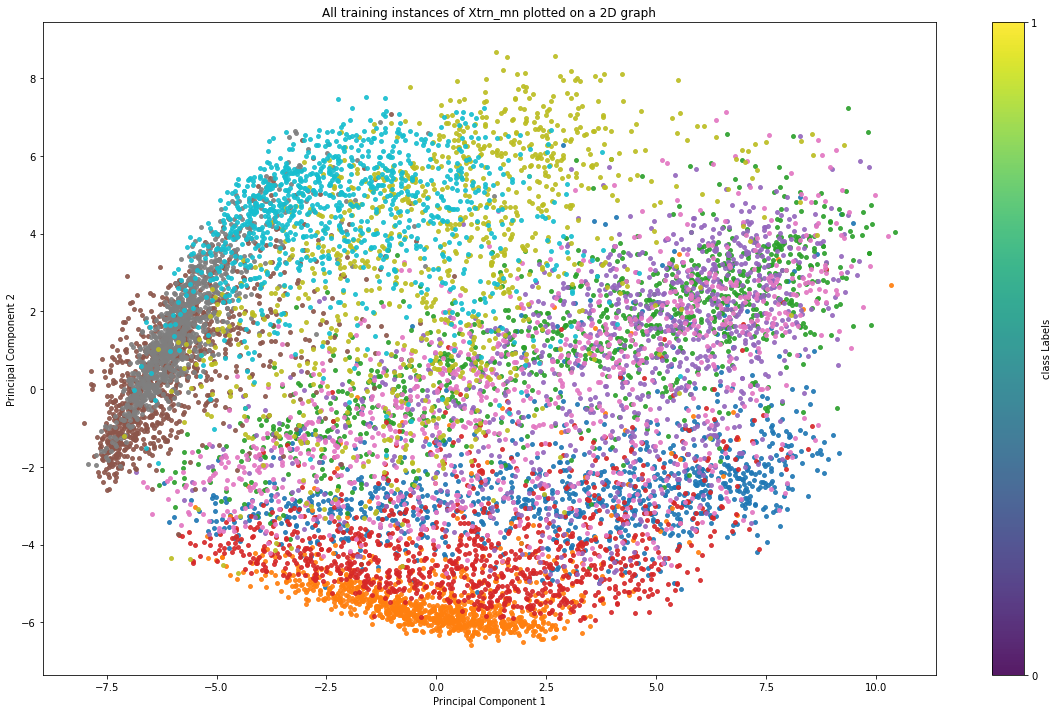

In [34]:
#(1) Your code goes here

# Using PCA to reduce the data down to 2D.
pca = PCA(n_components=2)
Xtrn_mn_pca = pca.fit_transform(Xtrn_mn)

# Creating the scatter plot of the PCA-transformed data coloured by class
plt.figure(figsize=(20, 12))
for i in range(len(np.unique(Ytrn))):
    plt.scatter(Xtrn_mn_pca[Ytrn == i, 0], Xtrn_mn_pca[Ytrn == i, 1], cmap="tabl10", alpha=0.9, s=15)

# Add axis labels and a title to the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(ticks=range(10), label = 'class Labels')
# plt.legend()
plt.title('All training instances of Xtrn_mn plotted on a 2D graph')

# Show the plot
plt.show()


#(2) ***Your text goes here***

Classes seem to be separated along different vectors with positive correlations between their PC1 and PC2

the closer to sides the denser the classes were, meaning that the classes to the sides are more tightly packed and more easily separable.

can still see a soft separation between the different classes, some classes such as the brown and orange ones on the sides, the more central the classes go between PC1 and PC2 the harder it is to tell the separation of the classes.

\pagebreak

# ========== Question 2.6 --- [8 marks] ==========

We consider applying multiclass classification to the data set. Make sure that you use **Xtrn_mn** for training and **Xtst_mn** for testing. 
1. [Code] Carry out a classification experiment using sklearn's **LogisticRegression** with "random_state=0", and report the classification accuracy and confusion matrix for the training set and test set respectively. Use sklearn's **ConfusionMatrixDisplay** to display the confusion matrix. Note that you may ignore a warning message in the training.
2. [Code] Run a classification experiment with SVM and report the classification accuracy and confusion matrix for the training set and test set respectively. Use sklearn's **SVC** with "random_state=0".
3. [Text] Based on the results obtained in 1 and 2, explain your findings and give brief discussions.

\pagebreak
## Your answers for Question 2.6

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy: 0.92370
Test accuracy: 0.81900


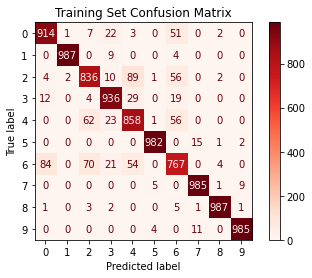

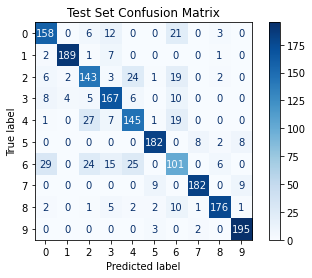

In [35]:
#(1) Your code goes here

# re importing this here because sometimes the confusion matrices do not show up due to earlier code.
from sklearn.metrics import confusion_matrix

# Creating the Logistic Regression classifier and fitting it to the training data.
LR = LogisticRegression(random_state = 0)
LR.fit(Xtrn_mn, Ytrn)

# Predicting the class labels for the training data and calculating the accuracy and confusion matrix
Ytrn_pred = LR.predict(Xtrn_mn)
Ytrn_accuracy = accuracy_score(Ytrn, Ytrn_pred)
Ytrn_cm = confusion_matrix(Ytrn, Ytrn_pred)

# Predicting the class labels for the test data and calculating the accuracy and confusion matrix
Ytst_pred = LR.predict(Xtst_mn)
Ytst_accuracy = accuracy_score(Ytst, Ytst_pred)
Ytst_cm = confusion_matrix(Ytst, Ytst_pred)

# Displaying the results
print(f'Training accuracy: {Ytrn_accuracy:.5f}')
print(f'Test accuracy: {Ytst_accuracy:.5f}')

# Displaying the Training Set Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix = Ytrn_cm, display_labels = np.unique(Ytrn))
disp.plot(cmap = 'Reds', values_format = '.4g')
plt.title('Training Set Confusion Matrix')
plt.show()

# Displaying the Test Set Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix = Ytst_cm, display_labels = np.unique(Ytst))
disp.plot(cmap='Blues', values_format = '.4g')
plt.title('Test Set Confusion Matrix')
plt.show()

Training accuracy: 0.91450
Test accuracy: 0.85500


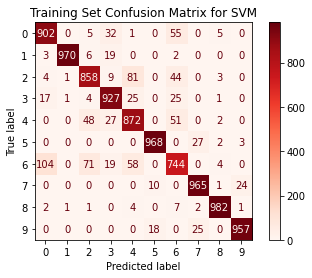

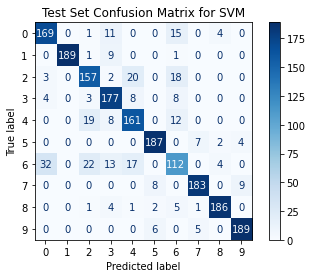

In [36]:
# Create the Logistic Regression classifier and fit it to the training data.
SVM = SVC(random_state=0)
SVM.fit(Xtrn_mn, Ytrn)

# Predicting the class labels for the training data and calculating the accuracy and confusion matrix
Ytrn_pred = SVM.predict(Xtrn_mn)
Ytrn_accuracy = accuracy_score(Ytrn, Ytrn_pred)
Ytrn_cm = confusion_matrix(Ytrn, Ytrn_pred)

# Predicting the class labels for the test data and calculating the accuracy and confusion matrix
Ytst_pred = SVM.predict(Xtst_mn)
Ytst_accuracy = accuracy_score(Ytst, Ytst_pred)
Ytst_cm = confusion_matrix(Ytst, Ytst_pred)

# Display the results
print(f'Training accuracy: {Ytrn_accuracy:.5f}')
print(f'Test accuracy: {Ytst_accuracy:.5f}')

# Display the confusion matrix for the training set
disp = ConfusionMatrixDisplay(confusion_matrix = Ytrn_cm, display_labels = np.unique(Ytrn))
disp.plot(cmap = 'Reds', values_format = '.4g')
plt.title('Training Set Confusion Matrix for SVM')
plt.show()

# Display the confusion matrix for the test set
disp = ConfusionMatrixDisplay(confusion_matrix = Ytst_cm, display_labels = np.unique(Ytst))
disp.plot(cmap='Blues', values_format = '.4g')
plt.title('Test Set Confusion Matrix for SVM')
plt.show()

#(3) Your text goes here

Based on the results obtained in 1 and 2, explain your findings and give brief discussions.

1. 
Training accuracy: 0.92370
Test accuracy: 0.81900
2.
Training accuracy: 0.91450
Test accuracy: 0.85500

The training accuracies are incredibly high therefore it could be argued that they might be overfitting. however their test accuracies are also incredibly high above 0.8. therefore, the model can predict the correct classification very effectively while training and testing.

This is also shown by the confusion matrices where the diagonal line has lots of points and both models falsely predicted any of the classifications.

class 6 was very often predicted true when not true and not predicted when true, meaning that this class was the most difficult for our classifiers to distinguish between the others.


\pagebreak

# ========== Question 2.7 --- [18 marks] ==========

This is a mini project, in which you are asked to improve the classification accuracy for the logistic regression model as much as possible from the one obtained in Question 2.6. 
1. [Text] Discuss possible approaches, and decide the one(s) you implement. Note that you should stick to the multinomial logistic regression model and should not use other classification models.
2. [Code and Text] Implement the approach you have chosen, carry out a classification experiment and report accuracy for the training set and test set respectively. Note that training and parameter tuning should be done on the training set and not on the test set. In case that you run parameter tuning, show and explain the result clearly.
3. [Text] Making a quick investigation to the result, report your findings and give brief discussions.

\pagebreak
## Your answers for Question 2.7

#(1) Your text goes here

I can normalise the data to reduce the effects of outliers. This will be especially useful when i use PCA for feature selection reducing the dimensions of the dataset in an attempt to find what really causes variations in the dataset.


I can use Ensemble methods for the model such as adaboost combining multiple models into an aggregate one with the ability to greatly increase their total predictive power.



I can do grid search to ensure that i have good hyperparametres in place.



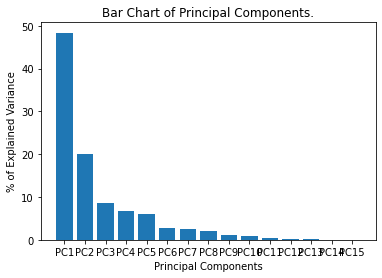

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy: 0.92370
Test accuracy: 0.81900


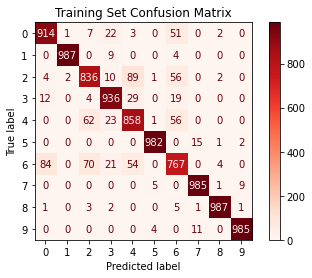

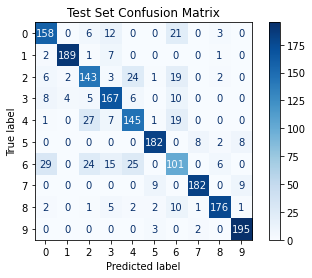

In [37]:
#(2) Your code and text goes here



# Scale the data and fit it to PCA. this acts as normalising the data therefore, reducing the issues 
# caused by outliers when it comes to PCA
scaled_data = preprocessing.scale(X)
pca = PCA() 
pca.fit(scaled_data) 
pca_data = pca.transform(scaled_data)

# Display the results of each Principal Component.
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('% of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Bar Chart of Principal Components.')
plt.show()

# Now do feature selection. I will choose every Principal Component which explains over 5% of the variance
# as shown by the bar chart.
pca = PCA(n_components = 1)
pca.fit(scaled_data) 
pca_data = pca.transform(scaled_data)
# Creating the Logistic Regression classifier and fitting it to the training data.
LR = LogisticRegression(random_state = 0)
LR.fit(Xtrn_mn, Ytrn)







# Predicting the class labels for the training data and calculating the accuracy and confusion matrix
Ytrn_pred = LR.predict(Xtrn_mn)
Ytrn_accuracy = accuracy_score(Ytrn, Ytrn_pred)
Ytrn_cm = confusion_matrix(Ytrn, Ytrn_pred)

# Predicting the class labels for the test data and calculating the accuracy and confusion matrix
Ytst_pred = LR.predict(Xtst_mn)
Ytst_accuracy = accuracy_score(Ytst, Ytst_pred)
Ytst_cm = confusion_matrix(Ytst, Ytst_pred)

# Displaying the results
print(f'Training accuracy: {Ytrn_accuracy:.5f}')
print(f'Test accuracy: {Ytst_accuracy:.5f}')

# Displaying the Training Set Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix = Ytrn_cm, display_labels = np.unique(Ytrn))
disp.plot(cmap = 'Reds', values_format = '.4g')
plt.title('Training Set Confusion Matrix')
plt.show()

# Displaying the Test Set Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix = Ytst_cm, display_labels = np.unique(Ytst))
disp.plot(cmap='Blues', values_format = '.4g')
plt.title('Test Set Confusion Matrix')
plt.show()

#(3) Your text goes here